# Post-Training: Experimental Place Cells


This notebook compares the place cells entering the training pipeline, to the place cells reconstructed by the decoder.

This notebook takes < 1 minute to run on a server with 32 CPUs.

## Setup

In [1]:
import os
import subprocess

gitroot_path = subprocess.check_output(
    ["git", "rev-parse", "--show-toplevel"], universal_newlines=True
)

os.chdir(os.path.join(gitroot_path[:-1], "neurometry"))
print("Working directory: ", os.getcwd())

import warnings

warnings.filterwarnings("ignore")

import sys

sys_dir = os.path.dirname(os.getcwd())
sys.path.append(sys_dir)
print("Directory added to path: ", sys_dir)
sys.path.append(os.getcwd())
print("Directory added to path: ", os.getcwd())

Working directory:  /home/nmiolane/code/neurometry/neurometry
Directory added to path:  /home/nmiolane/code/neurometry
Directory added to path:  /home/nmiolane/code/neurometry/neurometry


## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import datasets.experimental as experimental

TRAINED_MODELS = os.path.join(os.getcwd(), "results/trained_models")
print(f"Available trained models in directory: {TRAINED_MODELS}")
for model_path in os.listdir(TRAINED_MODELS):
    print("-", model_path)

INFO: Using pytorch backend


Available trained models in directory: /home/nmiolane/code/neurometry/neurometry/results/trained_models
- run_1756e481_experimental_41_other_gain_model.pt
- run_f46a7310_s1_synthetic_noise_var_0.01_embedding_dim_3_model.pt
- run_25ef354f_experimental_34_gain_1_model.pt
- run_0084d9ad_s1_synthetic_noise_var_0.001_embedding_dim_2_model.pt
- run_5b2c428e_experimental_41_gain_1_model.pt
- run_11da60ae_experimental_41_gain_1_model.pt
- run_22e2f52a_experimental_53_hd_gain_1_model.pt
- run_dd2afc50_experimental_34_gain_1_model.pt
- run_f94d6c5f_experimental_34_gain_1_model.pt
- run_5750ae64_s1_synthetic_noise_var_0.01_embedding_dim_10_model.pt
- run_390142d9_experimental_34_gain_1_model.pt
- run_0d3f2b93_s1_synthetic_noise_var_0.001_embedding_dim_5_model.pt
- run_025c1c00_s1_synthetic_noise_var_0.01_embedding_dim_20_model.pt
- run_6c905a80_s1_synthetic_noise_var_0.01_embedding_dim_20_model.pt
- run_8170c881_s1_synthetic_noise_var_0.01_embedding_dim_8_model.pt
- run_707bd9cd_experimental_34_g

## Plot experimental place cell activity at each angle

In [38]:
expt_id = "34_hd"
timestep_ns = int(1e6)

print(f"Loading experiment {expt_id}...")
place_cells, labels = experimental.load_neural_activity(
    expt_id=expt_id, timestep_microsec=timestep_ns
)

thetas = np.array(labels["angles"])
sort = np.argsort(thetas)
sorted_thetas = thetas[sort]

sorted_place_cells = place_cells[sort, :]

INFO: # - Found file at /home/nmiolane/code/neurometry/neurometry/data/binned/expt34_hd_times_timestep1000000.txt! Loading...
INFO: # - Found file at /home/nmiolane/code/neurometry/neurometry/data/binned/expt34_hd_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at /home/nmiolane/code/neurometry/neurometry/data/binned/expt34_hd_labels_timestep1000000.txt! Loading...


Loading experiment 34_hd...


In [39]:
print(place_cells.shape)
print(sorted_place_cells.shape)

(1736, 19)
(1736, 19)


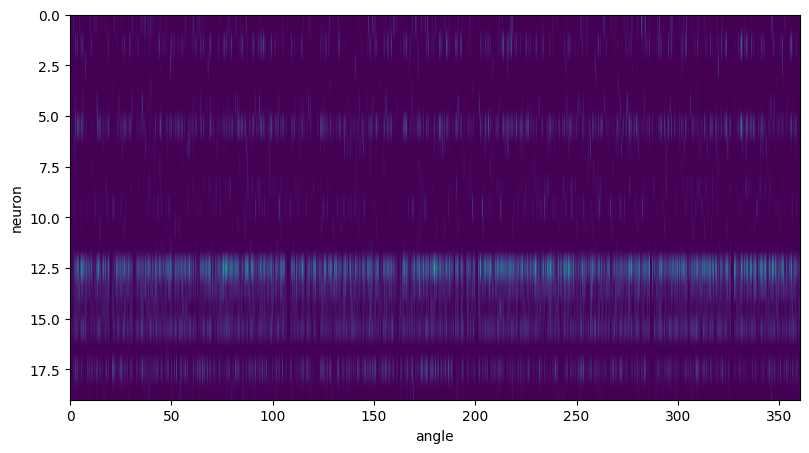

In [40]:
plt.figure(figsize=(20, 5))
plt.xlabel("angle")
plt.ylabel("neuron")

plt.imshow(
    sorted_place_cells.T, extent=[0, 360, sorted_place_cells.shape[1], 0], aspect=10
);

## Plot reconstructed place cells activity at each angle

We chose a trained model and inspect the reconstructed place cell activity.

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
selected_run = "run_6567aa3e_experimental_41_gain_1"

model_path = os.path.join(
    TRAINED_MODELS,
    # Choose from experiment 41
    f"{selected_run}_model.pt",
)
model = torch.load(model_path)

dataset = torch.Tensor(place_cells).to(device)
z, recon, posterior_params = model(dataset)

recon = recon.cpu().detach().numpy()
sorted_recon = recon[sort, :]

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16214x27 and 12x100)

In [ ]:
import matplotlib as mpl

color_norm = mpl.colors.Normalize(0.0, np.max(sorted_place_cells))

fig = plt.figure(figsize=(20, 10))

ax_data = fig.add_subplot(121)

ax_data.set_xlabel("angle")
ax_data.set_ylabel("neuron")

ax_data.set_title("Place cell recordings", fontsize=20)

im_data = ax_data.imshow(
    sorted_place_cells.T,
    extent=[0, 360, 40, 0],
    aspect=5,
    norm=color_norm,
    cmap="viridis",
)

ax_rec = fig.add_subplot(122)

ax_rec.set_xlabel("angle")
ax_rec.set_ylabel("neuron")

ax_rec.set_title("Reconstructed place cell activity", fontsize=20)

im_rec = ax_rec.imshow(
    sorted_recon.T, extent=[0, 360, 40, 0], aspect=5, norm=color_norm, cmap="viridis"
)

## Compare histograms of place cell activities

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121)

ax1.hist(sorted_place_cells.flatten())

ax2 = fig.add_subplot(122)

ax2.hist(sorted_recon.flatten())

ax1.set_xlabel("activation")

ax1.set_ylabel("frequency")

ax2.set_xlabel("activation")

ax2.set_ylabel("frequency")

ax1.set_title("Place cell activity distribution")

ax2.set_title("Reconstructed activity distribution");

## Plot experimental place cell activity at each time

In [ ]:
import importlib

import neurometry.viz as viz

importlib.reload(viz)
TRAINED_MODELS = os.path.join(os.getcwd(), "results/trained_models")
print(f"Available trained models in directory: {TRAINED_MODELS}")
for model_path in os.listdir(TRAINED_MODELS):
    print("-", model_path)

In [ ]:
CONFIG_DIR = os.path.join(os.getcwd(), "results", "configs")

print(f"Config in directory: {CONFIG_DIR}:")
for config_file in os.listdir(CONFIG_DIR):
    print(config_file)

In [ ]:
import json

selected_run = "run_6567aa3e_experimental_41_gain_1"

with open(os.path.join(CONFIG_DIR, f"{selected_run}.json"), "r") as f:
    config_dict = json.load(f)


# Convert a dict into an object where attributes are accessed with "."
# This is needed for the utils.load() function
class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self


config = AttrDict(config_dict)
config

In [ ]:
# Choose experiment id and timestep matching the config of the run chosen above.

expt_id = config.expt_id
timestep_microsec = config.timestep_microsec
device = "cuda" if torch.cuda.is_available else "cpu"

print(f"Loading experiment {expt_id}...")
place_cells, labels = experimental.load_neural_activity(
    expt_id=expt_id, timestep_microsec=timestep_microsec
)
dataset = place_cells
print(dataset.shape)


dataset = torch.Tensor(dataset).to(device)


model_path = os.path.join(
    TRAINED_MODELS,
    # Chooe a model matching the experiment and timestep chosen above
    f"{selected_run}_model.pt",
)
model = torch.load(model_path)

fig = viz.plot_recon_per_time(model, dataset, labels, config)

## Plot Place 